# Project 3

In the coding project below, answer relevant questions on Canvas via the assigment named Programming Project 3 Quiz Questions.

In the following exercise, we will perform linear regression to fit various data sets and to predict outputs. Perform the following analyses by starting a new notebook. 

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please uncomment and try the following lines; if they do not work, please try running them in the terminal without the `!` sign! (e.g. `pip install sklearn --user`

In [121]:
# %%capture
# !pip install penngrader --user

In [122]:
# !pip install seaborn --user
# !pip install sklearn --user
# !pip install statsmodels --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [123]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 20319687                         # 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Carlos Carrillo-Calderon"     # FULL NAME GOES HERE

In [124]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW3', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 20319687

Make sure this correct or we will not be able to store your grade


In [125]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Evaluation Metrics
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Data Leakage

A very important (read: **the most important** topic) in practical data science scenarios is that of data leakage. Data leakage is a situation that occurs when the creator of a machine learning model allows the model to read both training data and test data to train the model. In Programming Project 3, the training data and the test data are separated for you already. Thus, the linear regression model should only be trained with the training data. Predictions can be made on either the training data or the test data. In the upcoming weeks, we will explore why you shouldn't train the model with the test data as well and what methods we can employ to choose the training set and the test set.

## Part A

First, we will use the `Ch3PartA` dataset to generate polynomial regressions using `scikit-learn`.
This dataset contains 100 observations of points $x$ and their corresponding response, $y$. The data
is divided into a training set $(x_{tr}, y_{tr})$ and a test set $(x_{te}, y_{te})$, and all the values are doubles.

### A1.

To start, load `Ch3PartA.csv` into your notebook.

In [126]:
# Load the original dataset into a DataFrame:
df = pd.read_csv('Ch3PartA.csv')
df.head()

,x_tr,y_tr,x_te,y_te
0,0.249973,-0.225565,0.006047,0.043946
1,0.073364,0.435610,0.483860,-0.066113
2,0.663146,0.507205,0.123247,0.859564
3,0.595366,0.059467,0.307679,-0.305032
4,0.415146,-0.035114,0.926060,-0.472700


### A2.

Create a scatter plot of: 

(a) `y_tr` against `x_tr` and another of 

(b) `y_te` against `x_te`. 


Then, observe and comment on the similarities and differences between the plots.

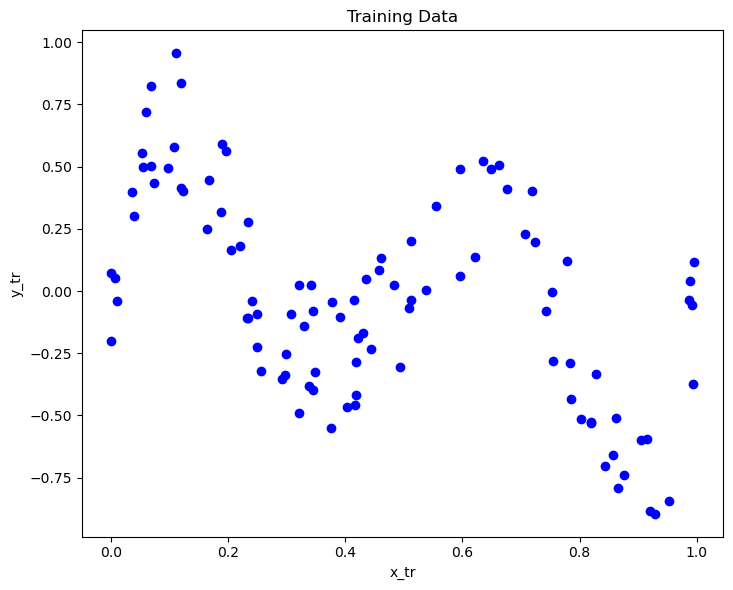

In [127]:
# Create Training and Test DataFrames:
df_train = pd.DataFrame({'x_tr': df['x_tr'], 'y_tr': df['y_tr']})
df_test = pd.DataFrame({'x_te': df['x_te'], 'y_te': df['y_te']})

# Scatter plot for training data:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_train['x_tr'], df_train['y_tr'], color='blue')
plt.title('Training Data')
plt.xlabel('x_tr')
plt.ylabel('y_tr')

plt.tight_layout()
plt.show()

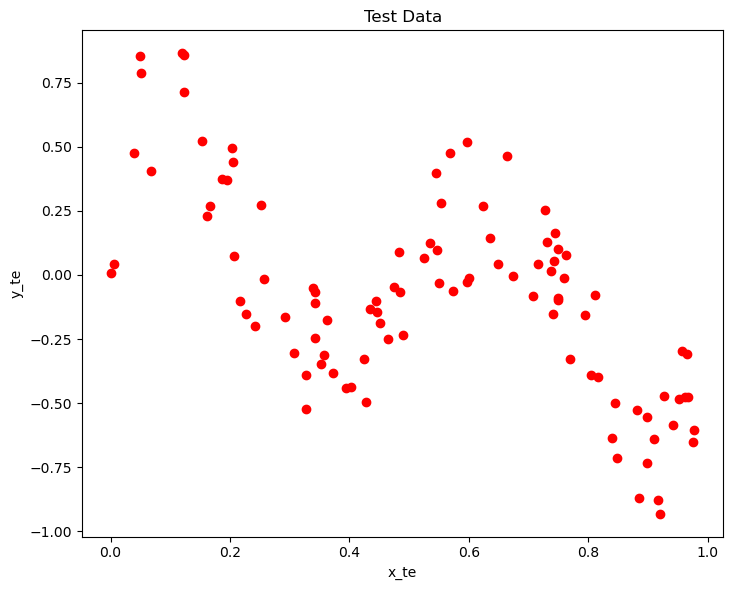

In [128]:
# Scatter plot for test data:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(df_test['x_te'], df_test['y_te'], color='red')
plt.title('Test Data')
plt.xlabel('x_te')
plt.ylabel('y_te')

plt.tight_layout()
plt.show()

What is the maximum value of `y` in the training set and in the test set? Please store these variables as `max_y_train` and `max_y_test` below and run the first grader cell! 

If you get 1 point, it means that you got both right. If you receive 0.5 points, you had only one right, and if you receive 0.25 points, then you correctly entered a tuple but both values were incorrect.

In [129]:
# Calculate the maximum values
max_y_train = df_train['y_tr'].max()
max_y_test = df_test['y_te'].max()

In [130]:
# View the results here before you submit
print(max_y_train, max_y_test)

0.95500282089616 0.8655959436070828


In [131]:
grader.grade(test_case_id = 'test_y_train_test', answer = (max_y_train, max_y_test))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, comment on the plot differences below. Please record your response into the multiline string named `plot_diffs_string` and then submit it to us via the grader cell!

In [132]:
plot_diffs_string = '''

Training Set (y_tr vs. x_tr):
    - Points are fairly spread out across the x-axis (0 to 1.0).
    - The y-values range from approximately -0.75 to 1.0.
    - There's a noticeable concentration of points with a moderate positive y-value and a few points with negative y-values.
    - The training set has a narrower range of y-values (-0.75 to 1.0) compared to the test set (-0.47 to 0.86).
    - The training set has a moderate clustering around the center of the y-axis
    
Test Set (y_te vs. x_te):
    - Points are also fairly spread out across the x-axis (0 to 0.98).
    - The y-values range from approximately -0.78 to 0.96.
    - There's a larger range of y-values compared to the training set, indicating more variability.
    - The test set shows more variability in the response values.
    - The test set shows more spread, with higher and lower y-values.

In General:
The primary difference between the two datasets is the variability in y-values. The test set has a broader 
range of y-values, indicating it may include more extreme or outlier data points compared to the training set. 
This difference can affect model performance, as models trained on less variable data might struggle to predict 
more variable data accurately. Therefore, as seen in the lectures, it’s crucial to ensure that both training and 
test datasets are representative of the problem space when evaluating models to achieve reliable metrics.

'''

In [133]:
grader.grade(test_case_id = 'test_plot_diff_test', answer = plot_diffs_string)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A3. 
Generate the necessary features to fit polynomial regressions up to the 20th degree (up to and including the $x_{20}$ term) on the training data. Hint: You will be fitting multi-variate linear regression models with polynomial features of $x$. Familiarize yourself with `sklearn.preprocessing.PolynomialFeatures`. 

Here, we're just asking you to practice generating the features. You'll pass one of them into the autograder for a quick check (although the autograder will not be very strict, so if you end up failing the next test case definitely make sure your work here is correct!)

In [134]:
# Convert to numpy arrays for sklearn
x_tr = np.array(df['x_tr']).reshape(-1, 1)
y_tr = np.array(df['y_tr'])
x_te = np.array(df['x_te']).reshape(-1, 1)
y_te = np.array(df['y_te'])

# Generate polynomial features up to the 20th degree
poly_degree = 20  
poly_features = PolynomialFeatures(degree=poly_degree)
x_tr_poly = poly_features.fit_transform(x_tr)

Now, let's check to make sure your highest-degree polynomial features are correct; namely the set of features that includes $x_{20}$, or `PolynomialFeatures(degree = 20)`. Please set `polynomial_features_df` as this **dataframe**.

If you do not receive full points, that means that either you have the wrong number of columns or some column values aren't correct!

In [135]:
polynomial_features_df = pd.DataFrame(x_tr_poly, columns=poly_features.get_feature_names_out(['x_tr']))

In [136]:
grader.grade(test_case_id = 'test_poly_coefficients_setups', answer = polynomial_features_df)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A4. 
Calculate the training MSE and the test MSE for 20 polynomial models up to degree 20. Store these as lists named `mse_train` and `mse_test` respectively. Hint: Familiarize yourself with the `sklearn.metrics.mean_squared_error` package and try to automate the process, e.g., using a for loop with degrees going from 1 to 20.

In [137]:
# Initialize lists to store MSE values
mse_train = []
mse_test = []

# Loop through polynomial degrees from 1 to 20:
for degree in range(1, poly_degree+1):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    x_tr_poly = poly.fit_transform(x_tr)
    x_te_poly = poly.transform(x_te)
    
    # Train the model
    model = LinearRegression()
    model.fit(x_tr_poly, y_tr)
    
    # Predict and calculate MSE for training set
    y_tr_pred = model.predict(x_tr_poly)
    mse_tr = mean_squared_error(y_tr, y_tr_pred)
    mse_train.append(mse_tr)
    
    # Predict and calculate MSE for test set
    y_te_pred = model.predict(x_te_poly)
    mse_te = mean_squared_error(y_te, y_te_pred)
    mse_test.append(mse_te)

Run the grader cells for both `mse_train` and `mse_test` in order; please make sure you don't put the wrong cell in!

In [138]:
grader.grade(test_case_id = 'test_mse_polynomials_train', answer = mse_train)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [139]:
grader.grade(test_case_id = 'test_mse_polynomials_test', answer = mse_test)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A5.

Generate a plot of both the training MSE and test MSE against flexibility (polynomial degree) for degrees 1 to 20. 

Find the minimum training and testing MSEs and set them to `min_train_mse` and `min_test_mse` respectively.

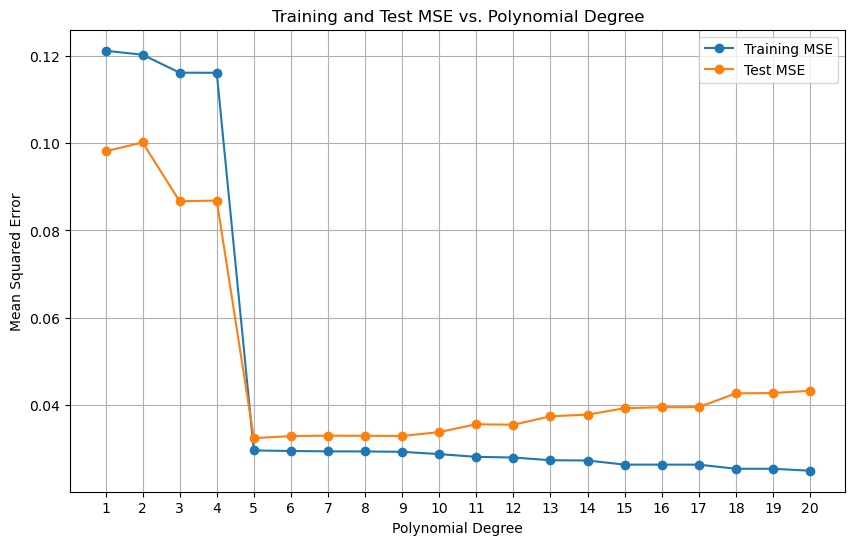

In [140]:
# Generate the plot
degrees = list(range(1, 21))
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_train, label='Training MSE', marker='o')
plt.plot(degrees, mse_test, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE vs. Polynomial Degree')
plt.legend()
plt.xticks(degrees)
plt.grid(True)
plt.show()

# # Find the minimum MSEs for training and testing
min_train_mse = min(mse_train)
min_test_mse = min(mse_test)

In [141]:
print(min_train_mse, min_test_mse)

0.02487478707317224 0.03234864152603431


*Hint*: You should see the `min_train_mse < min_test_mse` since we have a bit of overfitting. Run the grader cell below! Each of the variables is worth 1 point; we assign points based on how close you are to the true answer

In [142]:
grader.grade(test_case_id = 'test_min_mses_test', answer = (min_train_mse, min_test_mse))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A6. 
From your plot, make an educated guess about the polynomial degree of the function that
was used to generate the data. Then, give an estimate of the irreducible error $Var(\epsilon)$ for the optimal model on both the training set and test set. 

*Hint*: The optimal model is obtained when we use the maximal degree polynomial that does not overfit. Revisit the section on hypothesis testing and think about the relationship between MSE, RSS, and RSE to calculate the irreducible error.

In [143]:
# Educated guess for degree based on graphic plot:
degree = 5

# Create polynomial features:
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly = poly.fit_transform(x_tr)
x_test_poly = poly.transform(x_te)

# Train linear regression model:
model = LinearRegression()
model.fit(x_train_poly, y_tr)

# Calculate predictions on train and test sets:
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

# Calculate Mean Squared Error (MSE):
MSE_train = np.mean((y_tr - y_train_pred)**2)
MSE_test = np.mean((y_te - y_test_pred)**2)

# Calculate Residual Standard Errors (RSE) for training:
n_train = x_tr.shape[0]
p_train = x_train_poly.shape[1] # Number of features including bias term
RSE_train_sq = MSE_train * (n_train / (n_train - p_train))

# Calculate Residual Standard Errors (RSE) for test:
n_test = x_te.shape[0]
p_test = x_test_poly.shape[1]  # Number of features including bias term
RSE_test_sq = MSE_test * (n_test / (n_test - p_test))

Please set your respective irreducible errors as `RSE_train_sq` and `RSE_test_sq` respectively, and set the number of polynomial features as `degree`. Then, run the grader cell below. It grades similar to above, but we add 1 point for the `degree` variable!

In [144]:
print("Desired degree for best model: ", degree)
print("Irreducible error (training): ", RSE_train_sq)
print("Irreducible error (test): ", RSE_test_sq)

Desired degree for best model:  5
Irreducible error (training):  0.03108180268743282
Irreducible error (test):  0.03405120160635578


In [145]:
grader.grade(test_case_id = 'test_irreducible', answer = (degree, RSE_train_sq, RSE_test_sq))

Correct! You earned 3.0/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Next, we will use the `Ch3PartB` dataset to observe the effects of collinearity using `statsmodels`.
This dataset contains 100 observations of points $(x1, x2)$, and $y$, the response variable.

### B1. 
Load the data from `Ch3PartB.csv` into a pandas DataFrame.

In [146]:
# Load the original dataset into a DataFrame:
df = pd.read_csv('Ch3PartB.csv')
df.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


### B2. 
Show a scatterplot displaying the relationship between $x1$ and $x2$ 

What is the correlation coefficient between $x1$ and $x2$? Compute the answer and store it as `correlation_variable` -- it should be a single floating-point number

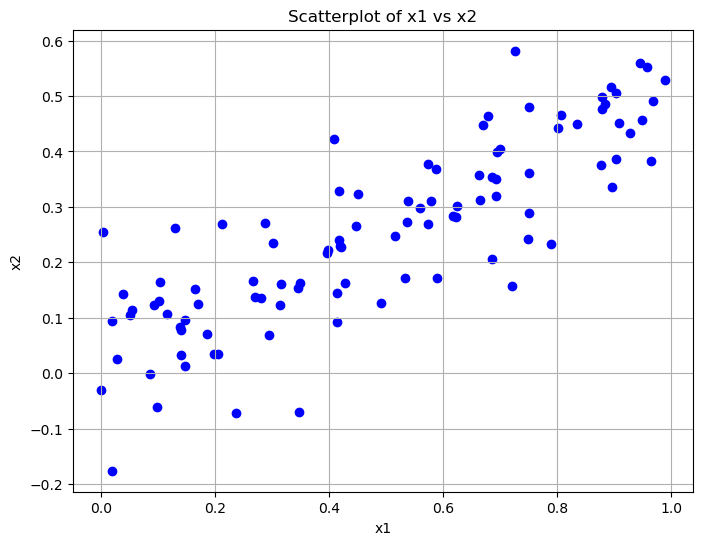

In [147]:
# Plot a scatterplot displaying the relationship between x1 and x2
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of x1 vs x2')
plt.grid(True)
plt.show()

In [148]:
correlation_variable = df['x1'].corr(df['x2'])
print("correlation_variable", correlation_variable)

correlation_variable 0.8390596222844916


In [149]:
grader.grade(test_case_id = 'test_correlation', answer = correlation_variable)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B3. 

Using the data, fit a least squares regression to predict $y$ using $x1$ and $x2$. Describe your results in a Markdown cell. 

*Hint*: Familiarize yourself with `statsmodels.formula.api.ols`. 

We have several questions here as well:

(a) What are the estimates $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$?

(b) At a 95% confidence level, can you reject the null hypothesis $H_0: \beta_1 = 0$? 

(c) What about $H_0: \beta_2 = 0$?

In [150]:
import statsmodels.api as sm
alpha = 0.05

# Create a new DataFrame for this case:
data = {'x1':df['x1'], 'x2':df['x2'], 'y':df['y']}
x1_x2_df = pd.DataFrame(data)

# Add a constant column for the intercept
x1_x2_df['intercept'] = 1

# Fit the linear regression model
model = sm.OLS(x1_x2_df['y'], x1_x2_df[['intercept', 'x1', 'x2']])
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           4.40e-07
Time:                        00:06:51   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1893      0.199     11.021      0.0

## Interpreting the results:

### Coefficients: 
>The coefficients represent the estimated effect of each predictor variable on the response variable 𝑦. For example, if the coefficient for 𝑥1 is 0.5, it means that a one-unit increase in 𝑥1 is associated with a 0.5 unit increase in 𝑦, holding other variables constant.

### Standard Errors: 
>These indicate the variability of the coefficient estimates. Lower standard errors suggest more precise estimates.

### T-values and p-values: 
>The t-values are the coefficients divided by their standard errors. The p-values indicate the significance of each coefficient. A low p-value (< 0.05) suggests that the corresponding predictor variable is significantly associated with the response variable.

### R-squared: 
>This measures the proportion of variance in the response variable that is explained by the predictor variables. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

### Adjusted R-squared: 
>Similar to R-squared, but adjusted for the number of predictors in the model.

By examining these statistics, we can assess the overall fit of the regression model and the significance of each predictor variable in explaining the variation in the response variable.

For your answers to $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$, please input them either using code or typing the numbers from `statsmodels`' output into the variables below. You should include at least 4 digits after the decimal point.

In [151]:
beta_0 = (results.params.iloc[0])
beta_1 = (results.params.iloc[1])
beta_2 = (results.params.iloc[2])
results.params

intercept    2.189284
x1           0.704629
x2           2.502405
dtype: float64

Please run but *do not change* the cell below to set up your autograder. Afterr, run the first grader cell with these variables! You will receive 0.5 points for each variable.

In [152]:
# DO NOT CHANGE THIS CELL!
answer_dict = {
    0: beta_0, 
    1: beta_1,
    2: beta_2
}

In [153]:
grader.grade(test_case_id = 'test_betas', answer = answer_dict)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, we want to evaluate the hypothesis test of $H_0: \beta_1 = 0$ when both $x1$ and $x2$ are present.

Please compute either the $t$-value or $p$-value and set it as `test_statistic_b1`, then determine whether or not you reject the null hypothesiss at the $95\%$ confidence level. Set that variable as a boolean (`True/False`) as `reject_null_b1`. 

If your values are either incorrect or do not agree (i.e. you said the null would be rejected when it should not be), then you will not receive full points!

You will receive 0.5 points for getting the correct statistics as well as 1 points for your in-context evaluation of the null hypothesis.

In [154]:
# Extract the t-value and p-value for beta_1:
test_statistic_b1 = results.tvalues['x1']
p_value_b1 = results.pvalues['x1']

# Determine null hypothesis at the 95% confidence level:
reject_null_b1 = p_value_b1 < alpha

# Output test statistic and hypothesis decision:
print("Test statistic:", test_statistic_b1)
print("Rejected null hypothesis:", reject_null_b1)

Test statistic: 1.1065747100543457
Rejected null hypothesis: False


In [155]:
grader.grade(test_case_id = 'test_beta1_hypothesis', answer = (test_statistic_b1, reject_null_b1))

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Let's do the same for the other test, to evaluate the hypothesis test of $H_0: \beta_2 = 0$  when both $x1$ and $x2$ are present.

Please compute either the $t$-value or $p$-value and set it as `test_statistic_b2`, then determine whether or not you reject the null hypothesiss at the $95\%$ confidence level. Set that variable as a boolean (`True/False`) as `reject_null_b2`

You will receive 0.5 points for getting the correct statistics as well as 1 point for your in-context evaluation of the null hypothesis.

In [156]:
# Extract the t-value and p-value for beta_1:
test_statistic_b2 = results.tvalues['x2']
p_value_b2 = results.pvalues['x2']
 
# Determine null hypothesis at the 95% confidence level:
reject_null_b2 = p_value_b2 < alpha

# Output test statistic and hypothesis decision:
print("Test statistic:", test_statistic_b2)
print("Rejected null hypothesis:", reject_null_b2)

Test statistic: 2.1942592292014753
Rejected null hypothesis: True


In [157]:
grader.grade(test_case_id = 'test_beta2_hypothesis', answer = (test_statistic_b2, reject_null_b2))

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B4. 

Now fit a least squares regression to predict $y$ using only $x1$. Comment on your results.

Can you reject the null hypothesis $H_0: \beta_1 = 0$?

In [158]:
# Create a new DataFrame for this case:
data = {'x1':df['x1'], 'y':df['y']}
x1_df = pd.DataFrame(data)

# Add a constant column for the intercept
x1_df['intercept'] = 1

# Fit the linear regression model
model = sm.OLS(x1_df['y'], x1_df[['intercept', 'x1']])
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           6.68e-07
Time:                        00:06:52   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2486      0.201     11.209      0.0

When evaluating $H_0: \beta_1 = 0$ when fitting with only $x1$ please do the following:

- Please compute either the $t$-value or $p$-value and set it as `test_statistic_b4`
- Determine whether or not you reject the null hypothesiss at the $95\%$ confidence level; set that variable as a boolean (`True/False`) as `reject_null_b4`
- Determine if $x1$ is significant; set that result as a boolean (`True/False`) as `is_x1_significant`

Similar to previously, you'll receive points both for your test statistics and the evaluation.

In [159]:
# Extract the t-value and p-value for beta_1:
test_statistic_b4 = results.tvalues['x1']
p_value_b4 = results.pvalues['x1']
 
# Determine null hypothesis at the 95% confidence level:
reject_b4_null_hypothesis = p_value_b4 < 0.05

# Determine if x1 is significant at the 95% confidence level
is_x1_significant = reject_b4_null_hypothesis

# Output test statistic and hypothesis decision:
print("Test statistic:", test_statistic_b2)
print("Rejected null hypothesis:", reject_b4_null_hypothesis)

Test statistic: 2.1942592292014753
Rejected null hypothesis: True


In [160]:
grader.grade(test_case_id = 'test_b4_x1_hypothesis', answer = (
    test_statistic_b4, 
    reject_b4_null_hypothesis, 
    is_x1_significant)
)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B5. 

Now fit a least squares regression to predict $y$ using only $x2$. Comment on your results.

Can you reject the null hypothesis $H_0: \beta_2 = 0$?

In [161]:
# Create a new DataFrame for this case:
data = {'x2':df['x2'], 'y':df['y']}
x2_df = pd.DataFrame(data)

# Add a constant column for the intercept
x2_df['intercept'] = 1

# Fit the linear regression model
model = sm.OLS(x2_df['y'], x2_df[['intercept', 'x2']])
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.09e-07
Time:                        00:06:52   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2655      0.187     12.145      0.0

When evaluating $H_0: \beta_2 = 0$ when fitting with only $x1$ please do the following:

- Please compute either the $t$-value or $p$-value and set it as `test_statistic_b5`
- Determine whether or not you reject the null hypothesiss at the $95\%$ confidence level; set that variable as a boolean (`True/False`) as `reject_null_b5`
- Determine if $x2$ is significant; set that result as a boolean (`True/False`) as `is_x2_significant`

Scoring is identical to B4 above!

In [162]:
# Extract the t-value and p-value for beta_1:
test_statistic_b5 = results.tvalues['x2']
p_value_b5 = results.pvalues['x2']
 
# Determine null hypothesis at the 95% confidence level:
reject_b5_null_hypothesis = p_value_b5 < 0.05

# Determine if x2 is significant at the 95% confidence level
is_x2_significant = reject_b5_null_hypothesis

# Output test statistic and hypothesis decision:
print("Test statistic:", test_statistic_b5)
print("Rejected null hypothesis:", is_x2_significant)

Test statistic: 5.73335342568103
Rejected null hypothesis: True


In [163]:
grader.grade(test_case_id = 'test_b5_x2_hypothesis', answer = (
    test_statistic_b5, 
    reject_b5_null_hypothesis, 
    is_x2_significant)
)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B6. 

Do Part B Questions 3-5 contradict each other? Explain why or why not. 

In [164]:
explanation = '''
Multicollinearity Issue: When both predictors x1 and x2 are included, their coefficients might not 
appear significant due to multicollinearity, even if they are significant individually. This can 
lead to a situation where β1 and β2 are not significant in the full model but are significant 
in the individual models.

In this case, β1 is significant when included individually but not in the combined model, it suggests
multicollinearity or interaction effects.
'''

Now, comment on the apparent contradiction below. Enter a boolean (`True/False`) for whether or not the answers contradict as `is_contradiction`, and then record your explanation into the multiline string named `contradiction_string` and then submit it to us via the grader cell!

Please note that you'll need to have the right answer as well as have an explanation that has a reasonable set of keywords in order to get full credit!

*Note*: if you have an explanation that you think is reasonable but you aren't passing the autograder, let us know on Piazza!

In [165]:
is_contradiction = True
contradiction_string = explanation

In [166]:
grader.grade(test_case_id = 'test_contradiction_test', answer = (is_contradiction, contradiction_string))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.